# **Fundamentals of Data Science - Winter Semester 2022**


#### Leonardo Plini (TA), Luca Scofano (TA), Paolo Mandica (TA), and prof. Fabio Galasso
<plini.2000543@studenti.uniroma1.it> , <scofano@di.uniroma1.it>, <mandica@di.uniroma1.it>, <galasso@di.uniroma1.it>

## **#1 Homework: Image Filtering and Object Identification**

This first homework covers the main topics discussed in class.
Initially, you will be dealing with the original **Image Filtering** methods (*Question 1*), then you will have to work with **Edge Detection** algorithms (*Question 2*), and lastly, you are going to operate first-hand on **Object Identification** techniques (*Question 3*). 
Additionally, the homework will contain written questions and reports where you will be asked to write down your answer in Markdown language.
At the end of the homework there is an additional **Bonus Question** that can boost your score by **5 points**.

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOU TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner. After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

 **plini.2000543@studenti.uniroma1.it**, **mandica@di.uniroma1.it**, **scofano@di.uniroma1.it**, and **galasso@di.uniroma1.it** **by Thursday, October 20th, 23:59**.

-------------------------------------

**Outline and Scores for #1 Homework:**


* **Question 1: Image Filtering** *(9 points)*
  * **Question 1.0: Warm up**
  * **Question 1.1: 1D Filters**
  * **Question 1.2: 2D Filters**
  * **#1 Report**

* **Question 2: Edge Detection** *(9 points)*
  * **Question 2.1: Prewitt Operator**
  * **Question 2.2: Gradient Magnitude**
  * **Question 2.3: Laplacian Operator**
  * **Question 2.4: Canny Edge**
  * **Question 2.5: Laplacian Pyramid**

* **Question 3: Object Identification** *(12 points)*
  * **Question 3.1: Normalized Histograms**
  * **Question 3.2: Types of Histograms**
  * **Question 3.3: Image Retrival**
  * **Question 3.4: Closest Neighbours**
  * **#2 Report**

* **BONUS Question 4: Performance Evaluation** *(5 points)*


**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**



## **Question 1: Image Filtering *(9 Points)***

*Recommended libraries to use:*

In [62]:
## import packages
import numpy as np
import pandas as pd
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math
from scipy import ndimage

plt.rcParams["figure.figsize"] = (20,8)

In [63]:
def rgb2gray(rgb):
  '''
  Converts RGB images to grayscale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray
  

#### **Question 1.0: warm-up *(1/9 points)***

##### **Convolution**

Mathematically describe the convolution in the case of a 2D discrete image and illustrate its basic properties.

-------------------------------------------------------
The convolution is an exemple of a linear system.

Let I be the discrite image 
Let g be the kernel
Let f be the final matrix

Convolution is computed as:
$\sum_{k,l} I[m-k, n-l]g[k,l]$

If we have a 1D filter then it is computed as:
$\sum_{k,l} I[m-k, n]g[k]$

Since convolution is a linear system, we can use linear proprities.
The basic proprieties are:
<ul>
    <li>homogeneity: T[a X] = a T[X]</li>
    <li> additivity: T[X1 + X2] = T[X1] + T[X2] </li>
    <li>superposition: T[aX1 + bX2] = T[aX1] + T[bX2]</li>
    <li>linear systems if and only if super position</li>
</ul>




-------------------------------------------------------

**Exercise on convolution  (display at least 2 computions explicitely):**
Write your answer in Markdown 

In general, to be consistent with the definition, we use zero padding: this practice consists in adding a border of pixels all with value zero around the edges of the input image.
In our case, we will have that

$$
\begin{equation}
f[m,n] = 
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 8 & 5 & 2 & 0 \\
0 & 7 & 5 & 3 & 0 \\
0 & 9 & 4 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
*\begin{pmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{pmatrix}
=\begin{pmatrix}
... & ... & ... \\
... & 18 & ... \\
... & ... & ... \\
\end{pmatrix}
\end{equation}
$$



-------------------------------------------------------

f[m,n] =  $\sum_{-1 < k < +1; -1 < l < +1} I[m-k, n-l]g[k,l]$
f[1,1] = I[0,0]* g[2,2] + I[0,1] * g[2,1] + I[0,2] * g[2,0] +
        I[1,0]* g[1,2] + I[1,1] * g[1,1] + I[1,2] * g[1,0] +
        I[2,0]* g[0,2] + I[2,1] * g[0,1] + I[2,2] * g[0,0] = 
        0 * 1 + 0 * 0 + 0 * -1 +
        0 * 1 + 8 * 0 + 5 * - 1 + 
        0 * 1 + 7 * 0 + 5 * - 1 = -10

f[2,2] = I[1,1]* g[2,2] + I[1,2] * g[2,1] + I[1,3] * g[2,0] +
        I[2,1]* g[1,2] + I[2,2] * g[1,1] + I[2,3] * g[1,0] +
        I[3,1]* g[0,2] + I[3,2] * g[0,1] + I[3,3] * g[0,0] = 
        8 * 1 + 5 * 0 + 2 * -1 +
        7 * 1 + 5 * 0 + 3 * - 1 + 
        9 * 1 + 4 * 0 + 1 * - 1 = 18

f[3,3] = I[2,2]* g[2,2] + I[2,3] * g[2,1] + I[2,4] * g[2,0] +
        I[3,2]* g[1,2] + I[3,3] * g[1,1] + I[3,4] * g[1,0] +
        I[4,2]* g[0,2] + I[4,3] * g[0,1] + I[4,4] * g[0,0] = 
        5 * 1 + 3 * 0 + 0 * - 1 + 
        4 * 1 + 1 * 0 + 0 * - 1 + 
        0 * 1 + 0 * 0 + 0 * - 1 = 9





The final matrix is computed as:
\begin{pmatrix}
-10 & 10 & 10 \\
-14 & 18 & 14 \\
-9 & 12 & 9 \\
\end{pmatrix}

 





-------------------------------------------------------

#### **Question 1.1: 1D Filters *(3/9 Points)*** 


##### **1-D Gaussian Filter**
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.



![](./images/1gauss.png)



In [64]:
def gauss(sigma):
  """
  Gauss function taking as argument the standard deviation sigma
  The filter should be defined for all integer values x in the range [-3sigma,3sigma]
  The function should return the Gaussian values Gx computed at the indexes x
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  x = [i for i in range(-3* int(sigma) , 3*int(sigma)+1)]
  Gx = list()
  for i in x:
    Gx.append(np.exp(-i**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))

  np.array

  return np.array(Gx), np.array(x)    #Gx valori di gauss calcolati in x. Gx(x[i])

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

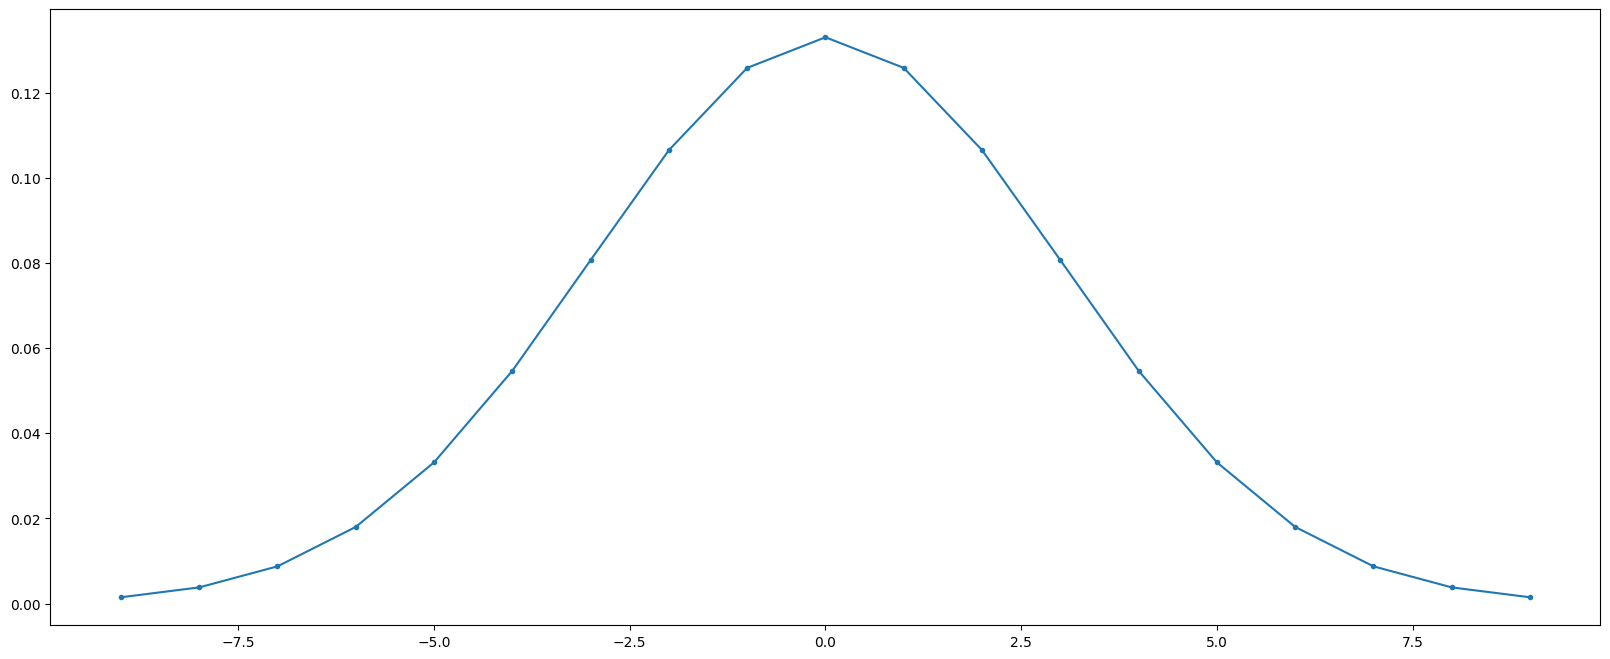

In [65]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### **1-D Box Filter**

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](./images/1box.png)

In [66]:
def box(filter_size=3):
    """
    Box function taking as argument the filter size
    The filter should be defined for all integer values and centered in zero
    The function should return the Box values Bx computed at the indexes x
    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    Bx = list()
    x = [0]

    for i in range(filter_size):
        Bx.append(1/(filter_size))

    for i in range(1, filter_size//2 + 1):
        x.append(i)
        x.insert(0,-i)
        
    return Bx,x


--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

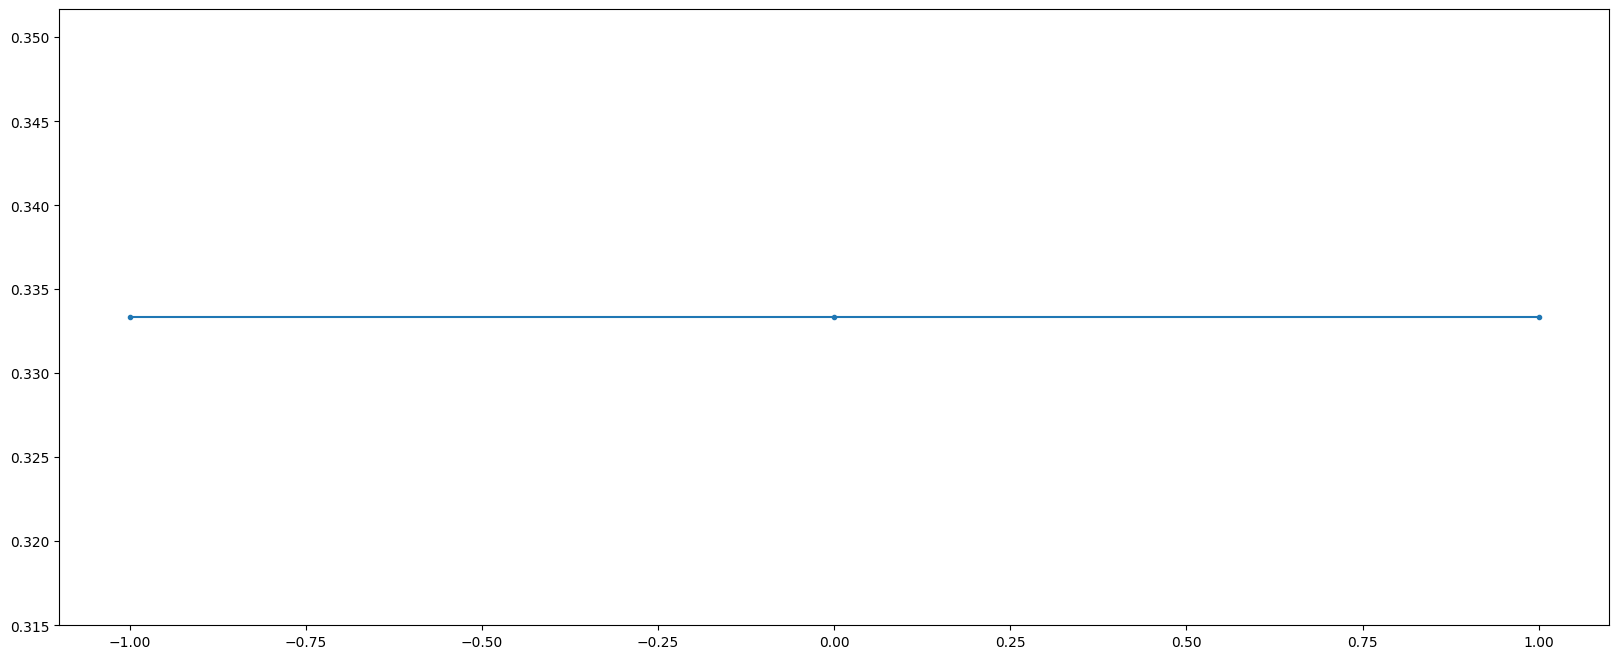

In [67]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### **1D Sharpening filter**

The sharpening linear filter should be defined for every value in the range [-3filter_size,3filter_size] on the integer values. The central value should be 1 and the values at the extremes should be -0.5. The values constantly increase from the first point up to the center and then they constantly decrease from the center up to the last point.
The method should return both a vector x of values on which the filter is defined and the transformed values Sx.

An example for filter_size=1:  
![](./images/1sharpening.png)

In [68]:
def sharpening(filter_size=3):
    """
    sharpening function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the sharpened values Sx computed at the indexes x


    The sharpening linear filter should be defined for every value in the range [-3filter_size,3filter_size] on the integer values.
    The central value should be 1 and the values at the extremes should be -0.5. The values constantly increase from the first point
    up to the center and then they constantly decrease from the center up to the last point.
    The method should return both a vector x of values on which the filter is defined and the transformed values Sx.

    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    x = np.arange(-3*filter_size, 3*filter_size + 1) # [-3 -2 -1  0  1 2 3]
    Sx = [1]
    step = (1 + 0.5) / (3* filter_size)
    for i in range(1, 3 * filter_size + 1):
        y = Sx[i-1]  - step
        Sx.append(y)
    section = Sx[1:]
    for y in section:
        Sx.insert(0, y)
    return Sx, x


--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

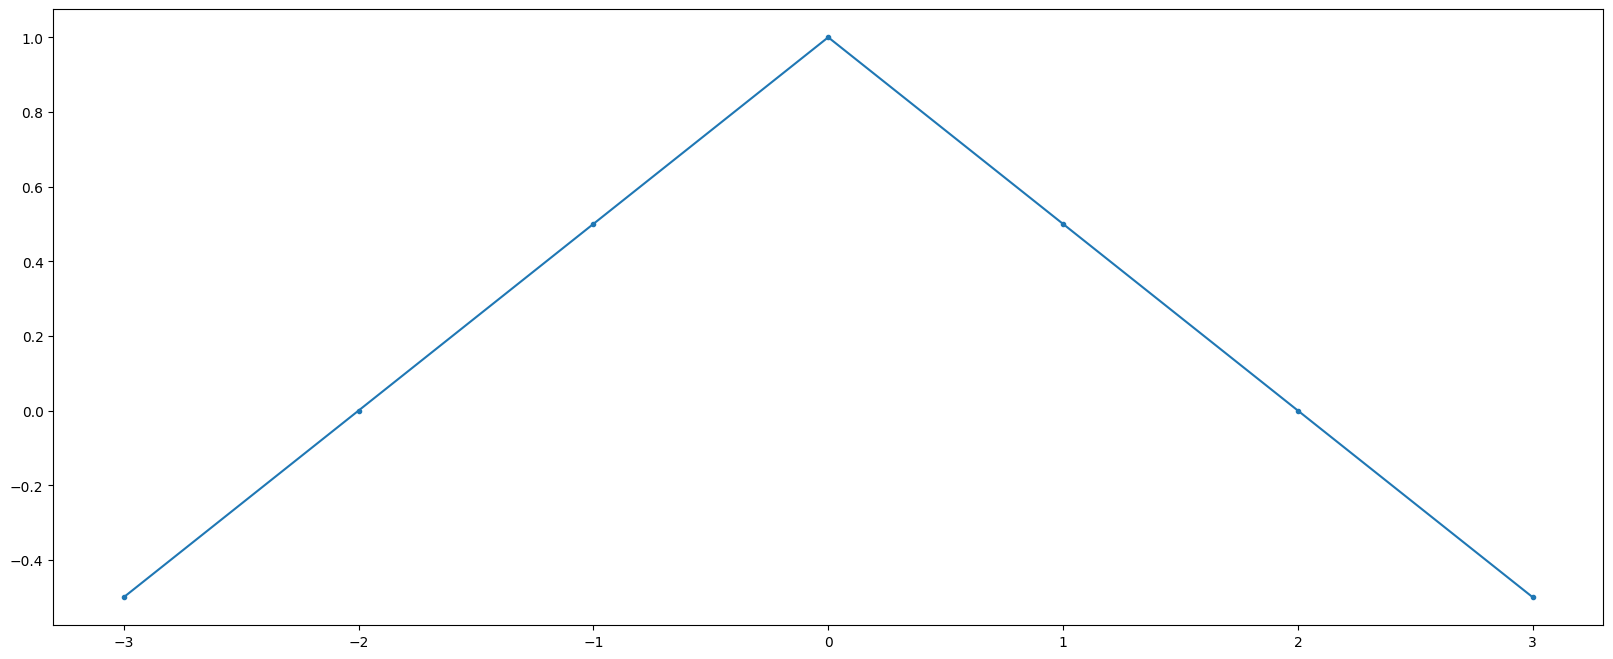

In [69]:
## function sharpening
filter_size = 1
Sx,x = sharpening(filter_size)
plt.figure(1)
plt.plot(x, Sx, '.-')
plt.show()

#### **Question 1.2: 2D Filters *(4/9 Points)***



##### **2-D Gaussian filter**
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](./images/stella_gauss.jpg)



In [70]:
def gaussfiltering(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
  Leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #calculate 1d gauss and then convolve it with the image with separability
  Gx, x = gauss(sigma)
  Gx = np.array(Gx)
  Gx = Gx.reshape(1, len(Gx)) #ottengo una lista con dentro UNA sola lista di valori di gauss
  smooth_img = conv2(img, Gx, mode='same')
  smooth_img = conv2(smooth_img, Gx.T, mode='same')


  return np.array(smooth_img)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

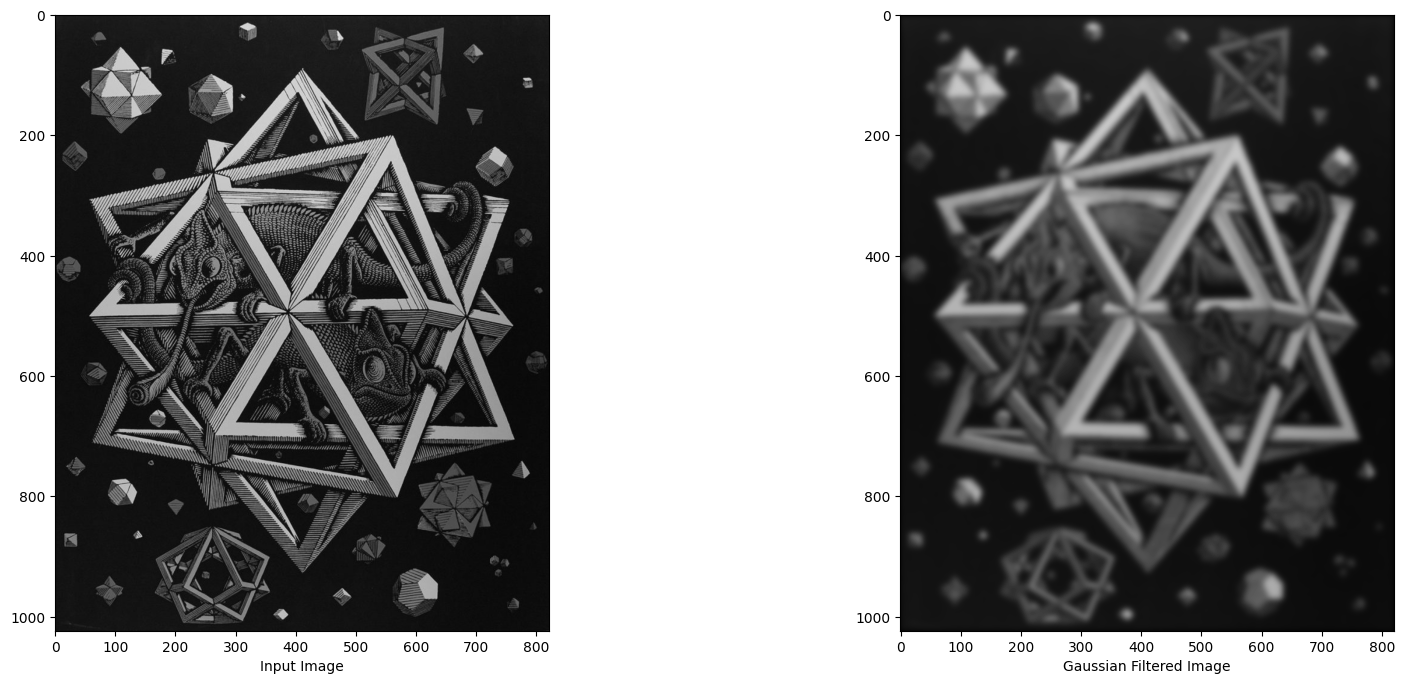

In [71]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = gaussfiltering(img, 5)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **2-D Box filter**
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](./images/box_image.jpg)



In [72]:
def boxfiltering(img, filter_size):
  """
  Implement a 2D Box filter, leveraging the previous box.
  Leverage the separability of Box filtering
  Input: image, filter_size
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  Bx, x = box(filter_size)
  Bx = np.array(Bx)
  Bx = Bx.reshape(1, len(Bx))
  smooth_img = conv2(img, Bx, mode='same')
  smooth_img = conv2(smooth_img, Bx.T, mode='same')

  return np.array(smooth_img)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

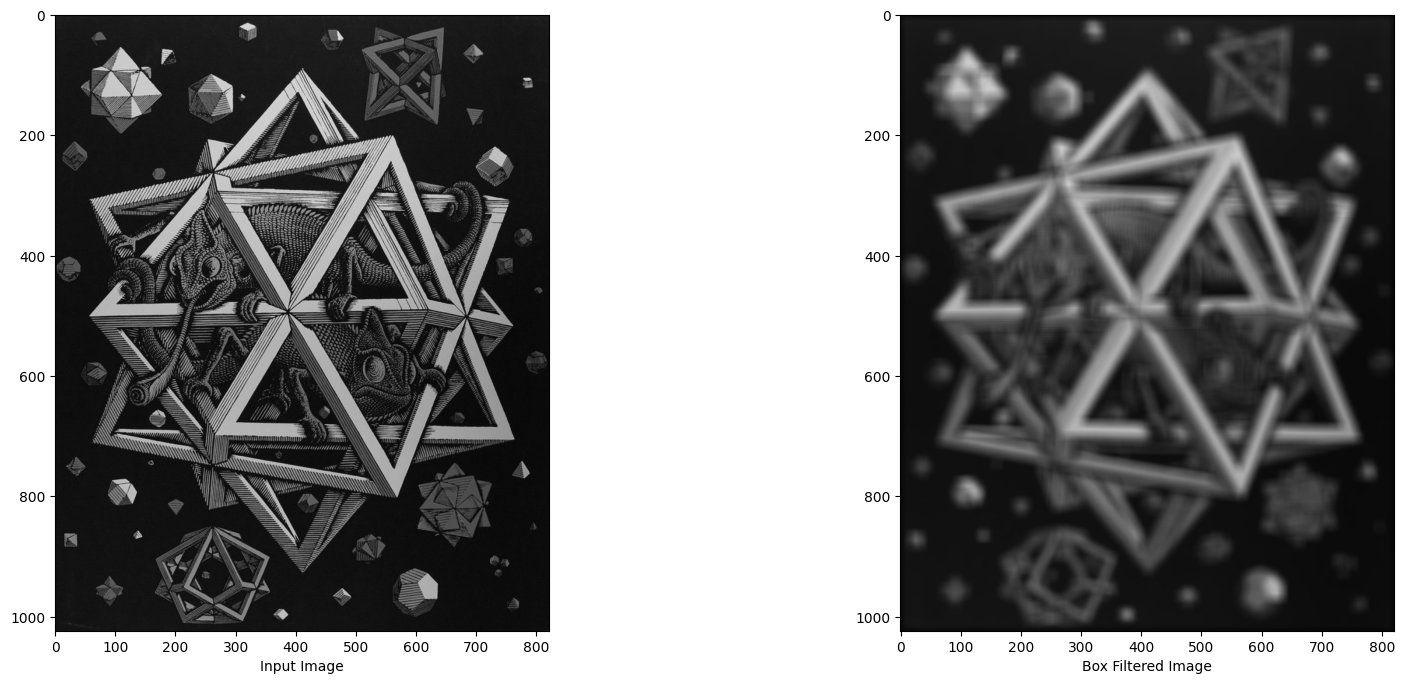

In [73]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()


##### **Separability and computational efficiency**

Illustrate analytically what does it mean that a Gaussian filter is separable

-------------------------------------------------------
An n dimensional gaussian convolution is equivalent to n 1d gaussian convolutio, as showed below

h(i,j) = f(i,j) *g(i,j)= $\sum_{k=1}^m$ $\sum_{l=1}^n$ g(k,l)f(i-k, j-l) = $\sum_{k=1}^m$ $\sum_{l=1}^n$ e<sup>- $\frac{k^2 + l^2}{2\sigma^2}$ </sup> f(i - k, j - l) = 
$\sum_{k=1}^m$ e<sup>- $\frac{k^2}{2\sigma^2}$ </sup> [ $\sum_{l=1}^n$ e<sup>- $\frac{l^2}{2\sigma^2}$ </sup> f(i-k, j-l)] = $\sum_{k=1}^m$ e<sup>- $\frac{k^2}{2\sigma^2}$ </sup> h' (i - k, j)
-------------------------------------------------------

Briefly explain why it is more convenient computationally speaking to use two 1D Gaussian filters rather than one 2D Gaussian filter. 
Assume that the dimension of the 2D Gaussian filter is $k^2$ and that the dimension of the two 1D Gaussian filters is $k$.

-------------------------------------------------------

Because a 2D gaussian filter will work in O(n^2) whilst applying two times a 1D gaussian filter it will take O(2n) = O(n).
Recall that O(n^2) is way higher than O(n).

-------------------------------------------------------

##### **Practical example of separability**

Previously, in the section "2-D Gaussian filter", you have implemented a 2D Gaussian filter using the separability property. In this section, you should implement another time the 2D Gaussian filter without using the separability.
Compare the images to check that the separability property is valid.

In [74]:
def gaussfiltering2(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve2D method (scipy.signal)
  Do NOT leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  Gx, intervals = gauss(sigma)
  kernel2d = []
  
  
  for y in range(len(intervals)):
    row = []
    for x in range(len(intervals)):
      row.append(1/(2*np.pi*sigma**2)*np.exp(-((intervals[x]**2 + intervals[y]**2)/(2*sigma**2))))
    kernel2d.append(row)
  
  smooth_img = conv2(img, kernel2d, mode='same')

  
  return smooth_img

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

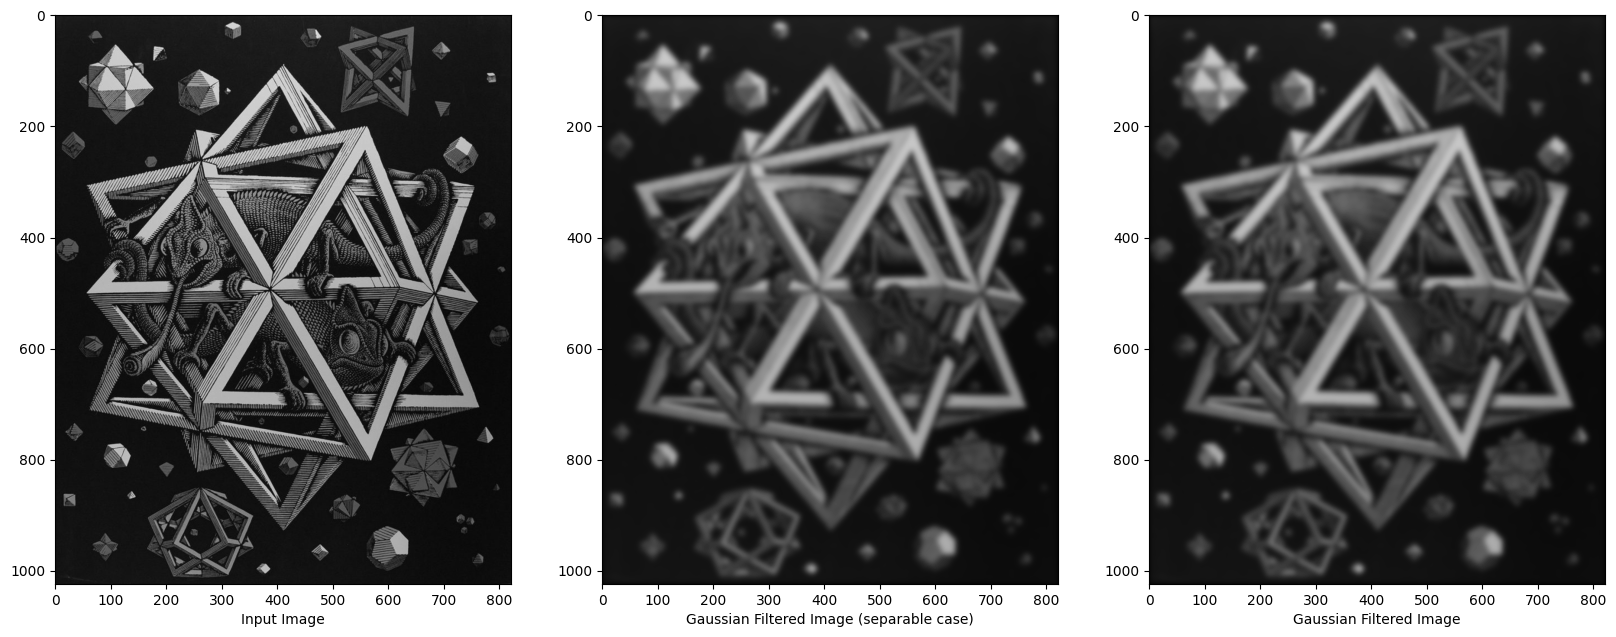

In [75]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = gaussfiltering(img, 5)
smooth_img2 = gaussfiltering2(img, 5)
plt.figure(2)
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Gaussian Filtered Image (separable case)')
ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Gaussian Filtered Image')


plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax3)
plt.imshow(smooth_img2, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Sharpening Filter**

Consider the first part of the reading at the folllowing link to implement a simple 2D Sharpening filter **using a Gaussian Kernel** defined before with $\sigma=5$:

* https://web.stanford.edu/class/cs448f/lectures/2.1/Sharpening.pdf

See figure below for illustration of the sharpening filter:
![Original Image](./images/sharpened.jpg)



In [76]:

def sharpening(img):
  """
  Implement a 2D Sharpening filter using a Gaussian Kernel with , leveraging the previous gauss.
  Input: image
  Output: sharpened image
  """

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #coarse = Gx * img
  #fine = Input - Coarse
  #Output = Input + fine*0.5

  
  coarse = gaussfiltering(img, 5)
  fine = img - coarse
  shapened_image = img + fine*0.5

  
  return shapened_image

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

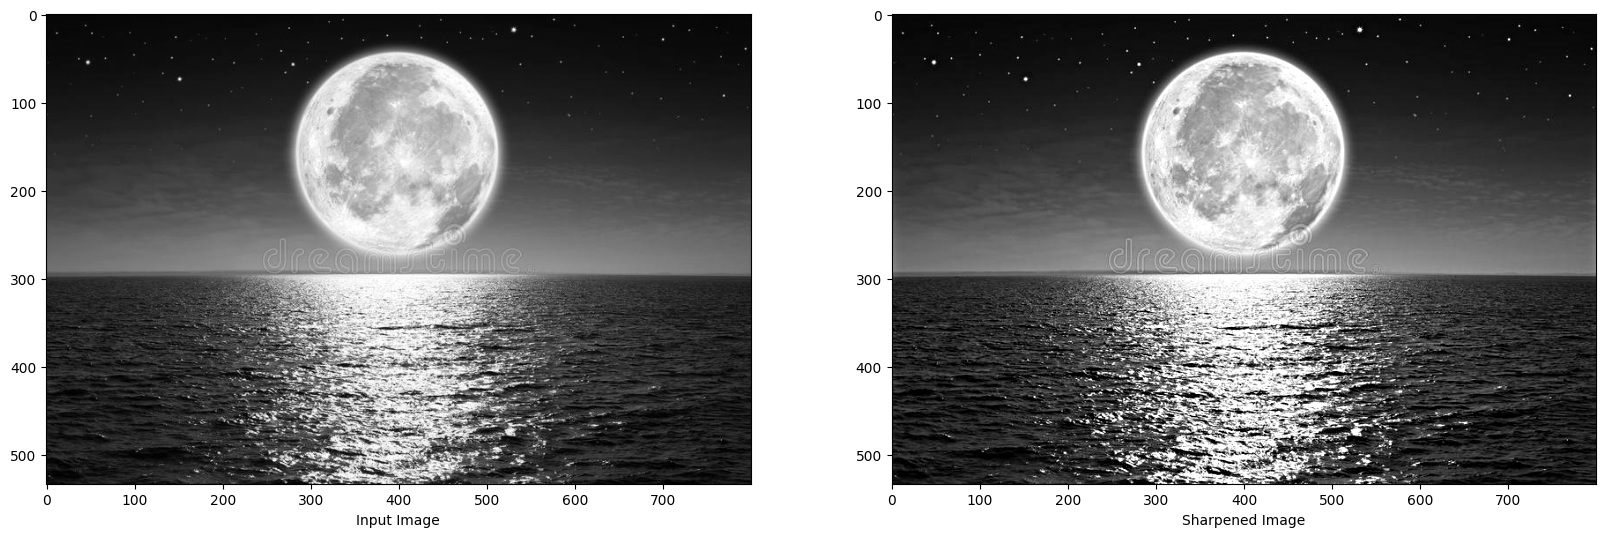

In [77]:
img = rgb2gray(np.array(Image.open('images/moon.jpg')))
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Sharpened Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(sharpening(img), cmap='gray', vmin=0, vmax=255)
plt.show()

### **#1 Report *(1/9 Points)***

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
* Ex 1: discuss the effect of sigma when using the gaussian filter
* Ex 2: write the filter that was used to produce the images


![](./images/ex1report1.png)

--------------------------------------------

 The blurring filtering, implemented with gauss, takes sigma as one of the arguments. The higher the sigma is, the larger the radius of the blurring will be. With the center pixels in the radius having more weight then the distant one, each pixel is going to be influenced very little by the very distant pixel in the radius.

--------------------------------------------

![](./images/ex2report1.png)

![](https://drive.google.com/uc?export=view&id=1rsJ7nYMoZ_O6doGhbArYtgMG1aVlI7AO)

--------------------------------------------
**Write your answer here**
 

- Image A filter -> Gaussian Filter
- Image B filter -> Box filter
- Image C filter -> Shapening Filter

--------------------------------------------

## **Question 2: Edge Detection** *(9 Points)*

Edges represents the object boundaries. So edge detection is a very important preprocessing step for any object detection or recognition process. Simple edge detection kernels are based on approximation of gradient images.

Now you are going to use some basic edge detection kernels.





#### **Question 2.1: Prewitt operator** *(1/9 Points)*


The Prewitt operator is used in image processing, particularly within edge detection algorithms. Technically, it is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.

See figure below for illustration of the prewitt operators in action:
![Original Image](./images/prewitt.jpg)



In [78]:
def prewitt_x(img):
  """
  Implement a 3x3 Prewitt discrete operator for vertical edges
  Input: image
  Output: image with vertical edges
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #compute a 3x3 Prewitt discrete operator for vertical edges
  prewitt_x = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1]).reshape(3,3)
  Fx = conv2(img, prewitt_x, mode='same')




  


  return Fx

In [79]:
def prewitt_y(img):
  """
  Implement a 3x3 Prewitt discrete operator for  horizontal edges
  Input: image
  Output: image with  horizontal edges
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
  Fy = conv2(img, prewitt_y, mode='same')

  

  return Fy

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

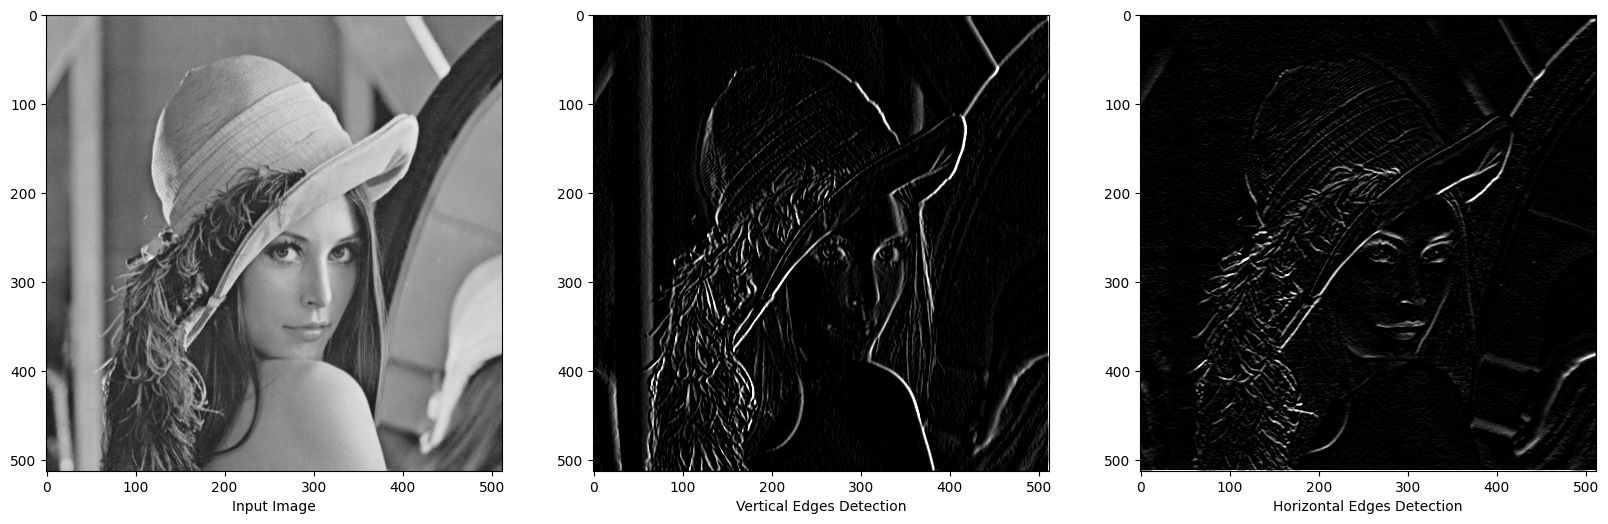

In [80]:
plt.figure(2)
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Vertical Edges Detection')
ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Horizontal Edges Detection')

plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(prewitt_x(img), cmap='gray', vmin=0, vmax=255)
plt.sca(ax3)
plt.imshow(prewitt_y(img), cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question 2.2: Gradient Magnitude** *(1/9 Points)*
Using the previously defined functions prewitt_x and prewitt_y, retrieve the gradient magnitude of the image.

See figure below for illustration of the Gradient Magnitude:
![Original Image](./images/gradient_magnitude.jpg)




In [81]:
def gradient_magnitude(img):
  """
  Input: image
  Output: gradient magnitude
  """

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #compute the gradient magnitude
  Fx = prewitt_x(img)
  Fy = prewitt_y(img)
  magnitude = np.sqrt(Fx**2 + Fy**2)



  return magnitude



--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

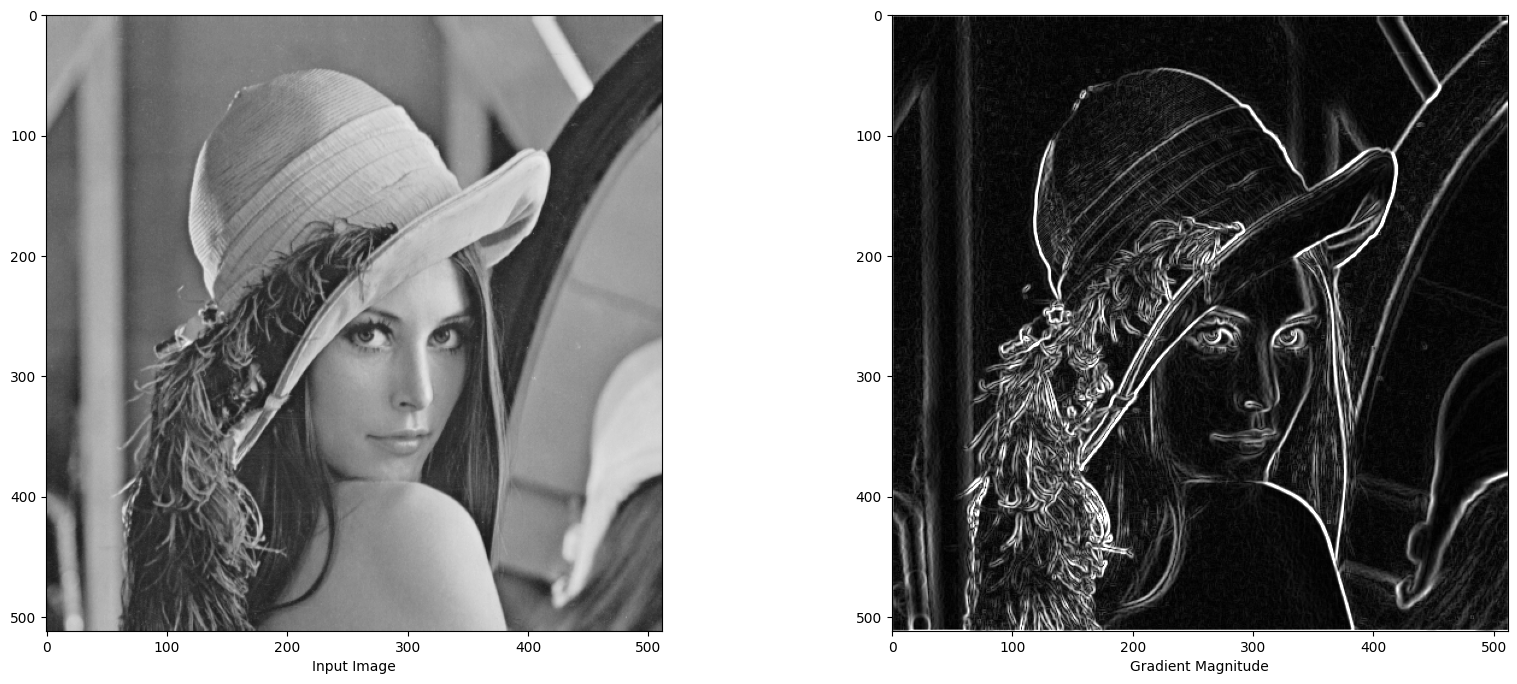

In [82]:
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gradient Magnitude')


plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(gradient_magnitude(img), cmap='gray', vmin=0, vmax=255)
plt.show()


#### **Question 2.3 Laplacian operator** *(2/9 Points)*
It is an approximation of second order derivative that defines zero crossing. In this section, we are interested in a  discrete laplacian operator.



See figure below for illustration of the discrete Laplacian:
![Original Image](./images/laplacian.png)



In [83]:
def discrete_laplace(img):
  """
  Input: image
  Output: image after applying the Laplacian operator
  """
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #the first derivative is defined ad [-1, 0, 1]
  #the second derivative is defined as [1, -2, 1]
  laplace = np.array([1, -2, 1]).reshape(1,3)
  Lap = conv2(img, laplace, mode='same')
  
  return Lap

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

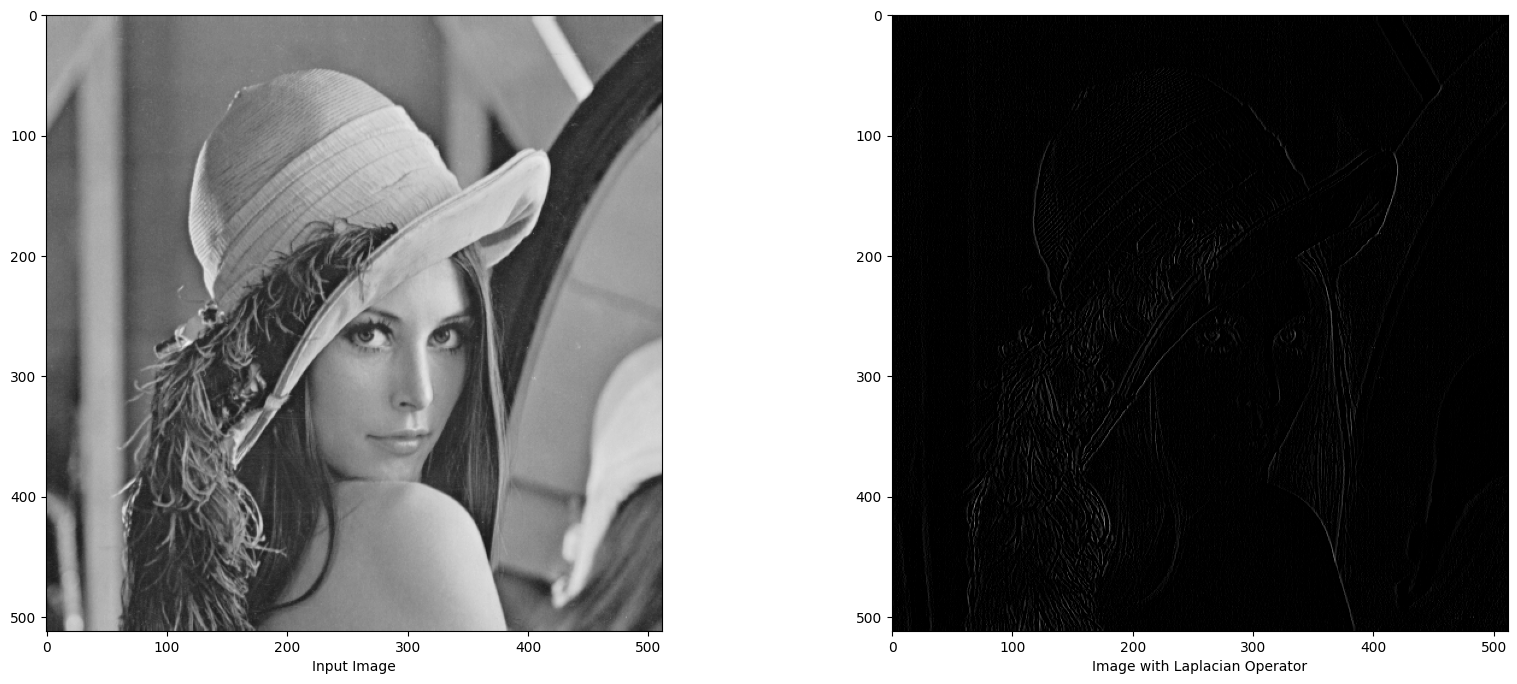

In [84]:
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Image with Laplacian Operator')
plt.sca(ax1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(discrete_laplace(img), cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question: 2.4 Canny Edge detector** *(3/9 Points)*
The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. 

The Canny edge detection algorithm is composed of 5 steps:

1. Noise reduction: apply Gaussian filter to smooth the image in order to remove the noise
2. Gradient calculation: find the intensity gradients of the image
3. Non-maximum suppression: apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4. Double threshold: apply double threshold to determine potential edges
5. Edge Tracking by Hysteresis: track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


##### **Stage 1**
Noise reduction: apply Gaussian filter to smooth the image in order to remove the noise. You can use the function gauss_filtering defined above with sigma=3.



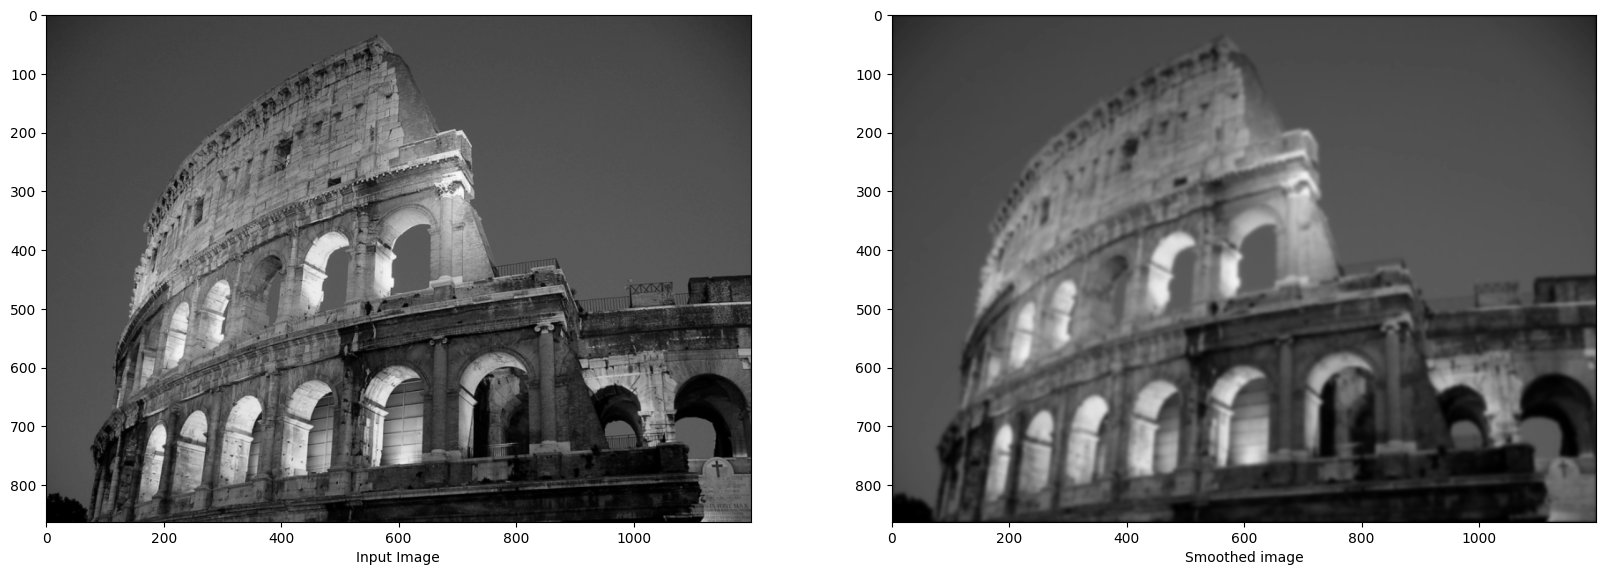

In [85]:
# STEP 1: 

img = rgb2gray(np.array(Image.open('images/colosseum.jpg')))
smoothed_img= gaussfiltering2(img, 3)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Smoothed image')
plt.sca(ax1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smoothed_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 2**
The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators.

Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively:

Our output should be the magnitude G and the slope θ of the gradient.
See figure below for the illustration of the gradient magnitude:

![Original Image](./images/CED_step2.jpg)


In [86]:
#STEP 2

def sobel_filters(img):
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
  Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
   
  Ix = convolve(img, Kx)
  Iy = convolve(img, Ky)
   
  G = np.hypot(Ix, Iy)
   #G = G / G.max() * 255
  theta = np.arctan2(Iy, Ix)

  

  
    
  return (G, theta)

In [87]:
#SOLUTION
#STEP 2

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = convolve(img, Kx)
    Iy = convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    #G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

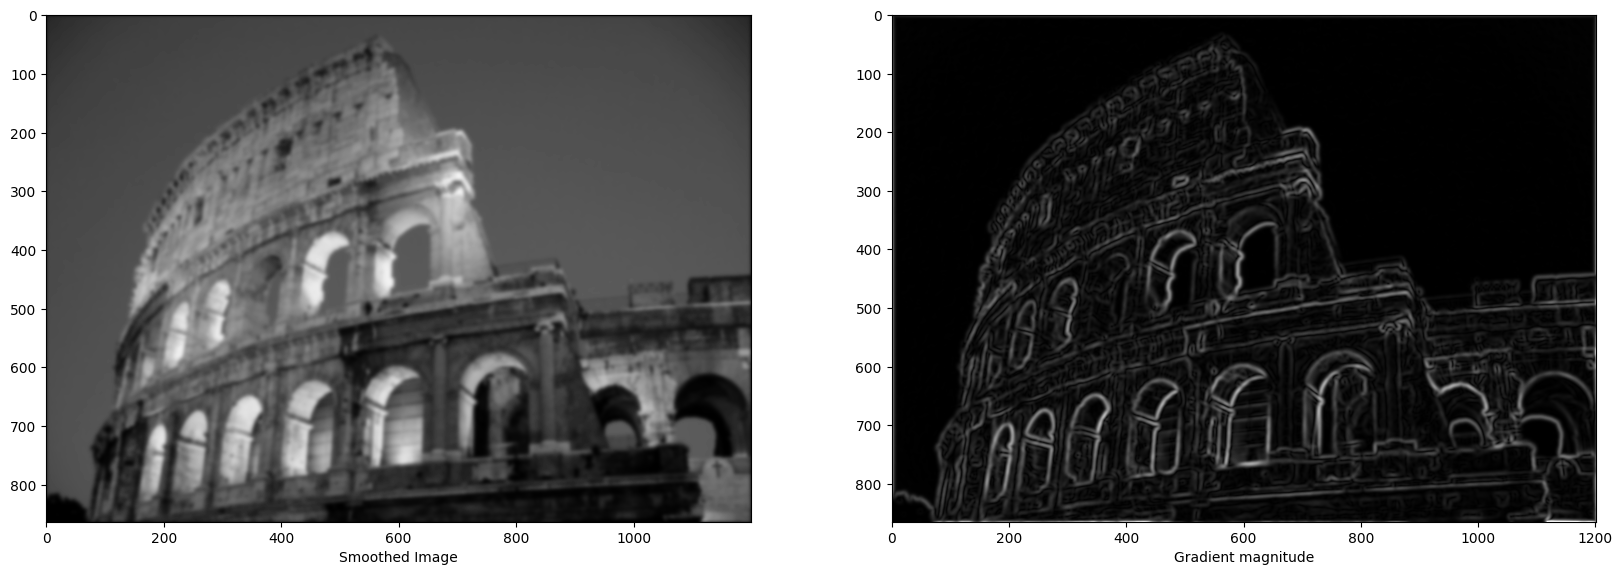

In [88]:
G,theta=sobel_filters(smoothed_img)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Smoothed Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gradient magnitude')
plt.sca(ax1)

plt.imshow(smoothed_img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 3** 
Non Maximum Suppression: the image is scanned along the image gradient direction, and if pixels are not part of the local maxima they are set to zero. This has the effect of supressing all image information that is not part of local maxima.

You just need to run the code for stage 3

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [89]:
# STEP 3
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 == angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

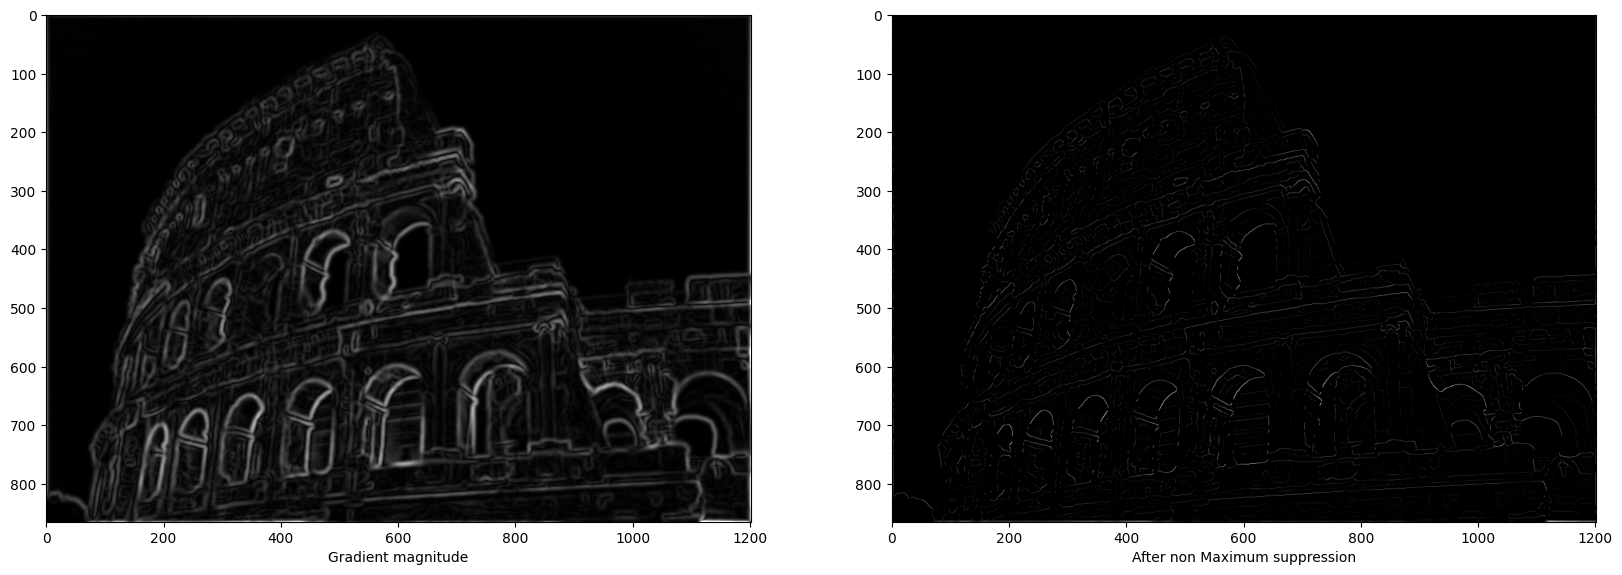

In [90]:
G,theta=sobel_filters(smoothed_img)
Z=non_max_suppression(G, theta)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Gradient magnitude')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After non Maximum suppression')
plt.sca(ax1)

plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(Z, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 4**
After application of non-maximum suppression, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. To account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. This is accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's gradient value is smaller than the low threshold value, it will be suppressed.

You just need to run the code for stage 4

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [91]:
# STEP 4
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

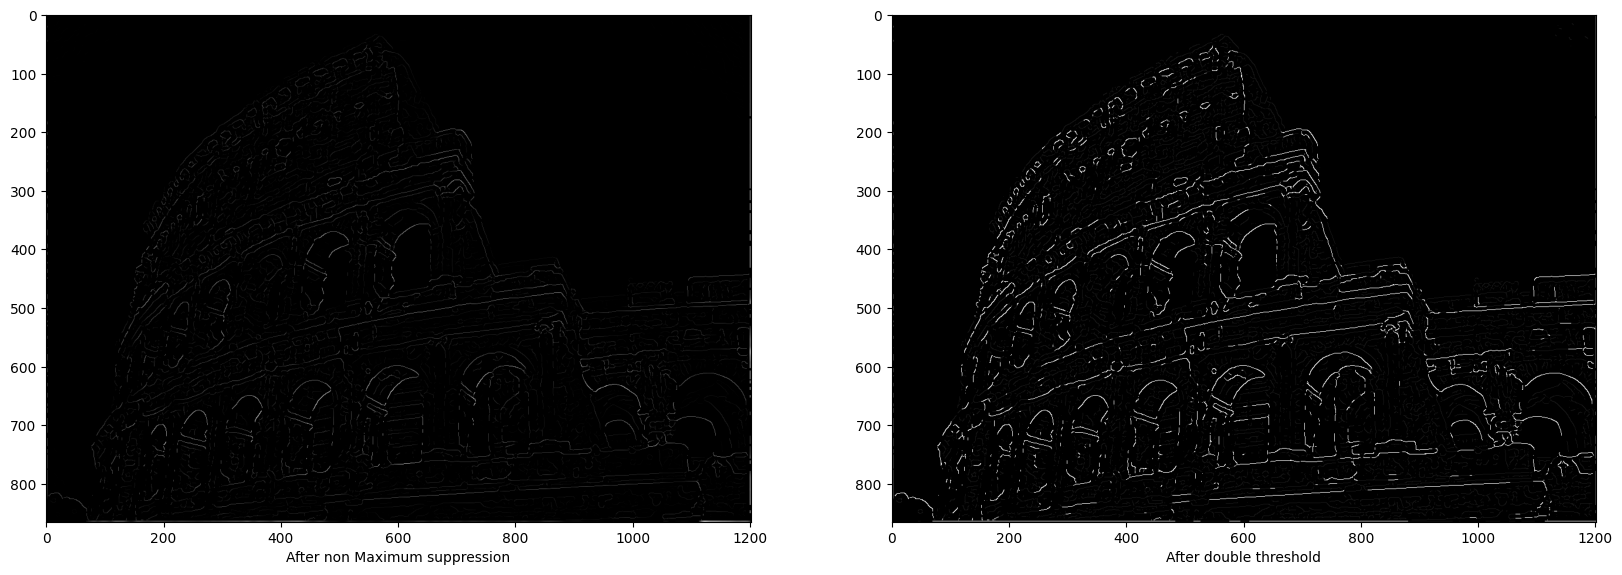

In [92]:
Z=non_max_suppression(G, theta)
res, weak, strong=threshold(Z, lowThresholdRatio=0.05, highThresholdRatio=0.09)
    

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('After non Maximum suppression')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After double threshold')
plt.sca(ax1)

plt.imshow(Z, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 5**
Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.

See figure below for the illustration of the final result:
![Original Image](./images/CED_step5.jpg)



In [93]:
# STEP 5


    

from tkinter import N


def hysteresis(img, weak=25, strong=255):

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    # 1. Find all the weak pixels that are connected to strong pixels
    
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    
    return img





--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

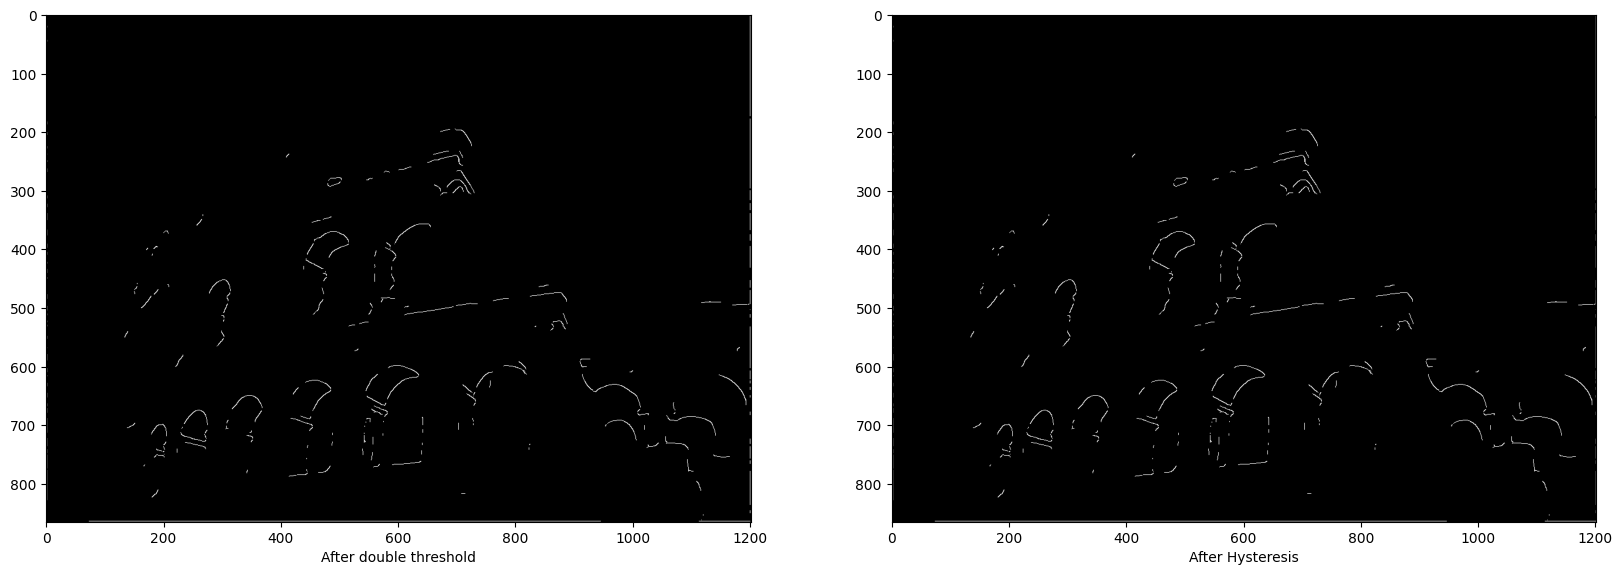

In [94]:
res, weak, strong=threshold(Z, lowThresholdRatio=0.1, highThresholdRatio=0.2)
final_img=hysteresis(res, weak, strong=255)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('After double threshold')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After Hysteresis')
plt.sca(ax1)

plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(final_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question: 2.5 Laplacian Pyramids** *(2/9 Points)*

Implement a Laplacian Pyramid: 
- Write a function for downscaling (you can use [`skimage.transform.resize`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.resize))
- Write a function for the Laplacian Pyramid consisting of the following steps: 
    1. **Downscale** the image by the input factor
    2. **Apply Gaussian filter** on the Image to obtain a smoothed image
    3. **Apply Laplacian filter** on the smoothed image to obtain edges (you can use [`scipy.ndimage.laplace`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html))
    4. **Plot** the 3 images side by side
    4. **Repeat** previous steps with the resized smoothed version of the image

See figure below for an illlustration of Laplacian Pyramid.
![](./images/laplacian_pyramid.png)

In [95]:
from skimage.transform import resize

def downscale(img, factor):
    '''
    This function should return the given image
    resized by the factor.
    Input:
    img: the image to resize
    factor: the factor you want use to downscale
    Output:
    resized: the resized image
    '''
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    resized = resize(img, (img.shape[0]*factor, img.shape[1]*factor))
    return resized
    

In [96]:
from scipy.ndimage import laplace

def LaplacianPyramid(img, steps=3, factor=0.5, sigma=4):
    '''
    This function implements the Laplacian Pyramid and shows the results.
    Leverage the "downscale" function.
    
    Inputs:
        img: the image
        steps: number of steps for the Pyramid
        factor: the scaling factor to resize the image at each step
        sigma: the Gaussian filter parameter
    '''
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    xsize = 20
    ysize = 20
    #downscale the image
    for i in range(steps):
        downscale_image = downscale(img, factor)
        Gx = gaussfiltering2(downscale_image, sigma)
        Lx = laplace(Gx)
        img = Gx


        

        fig, ax = plt.subplots(1, 3, figsize=(xsize, ysize))
        ax[0].imshow(downscale_image, cmap='gray')
        ax[0].set_title('Downscaled image')
        ax[1].imshow(Gx, cmap='gray', )
        ax[1].set_title('Gaussian filtered image')
        ax[2].imshow(Lx, cmap='gray')
        ax[2].set_title('Laplacian filtered image')
        plt.show()
        xsize = xsize*factor
        ysize = ysize*factor





    
    
    

**TODO:** explain how the Laplacian Filter works

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

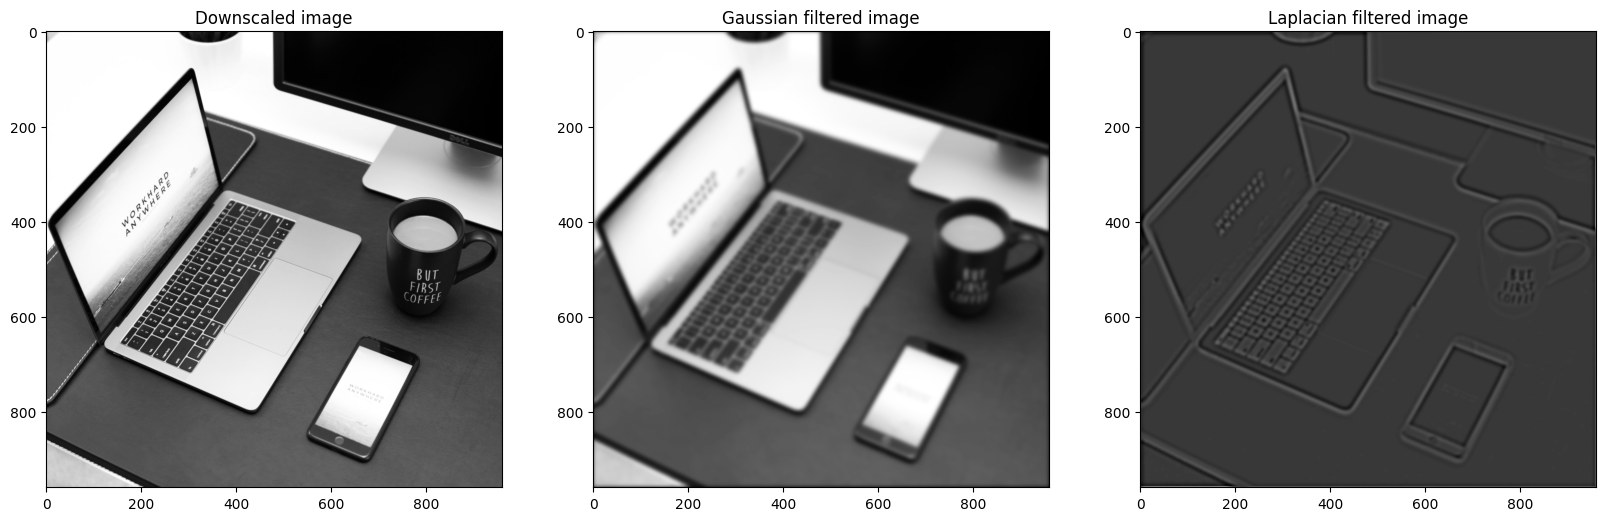

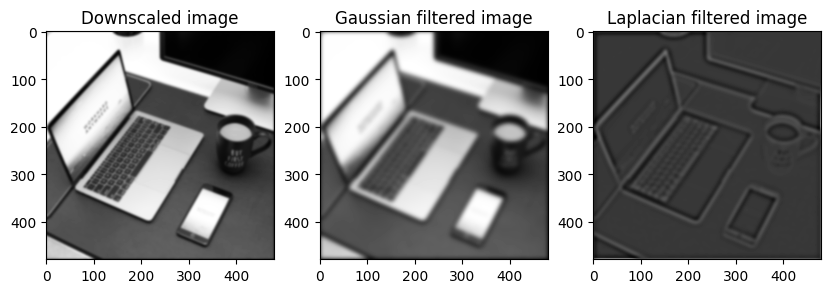

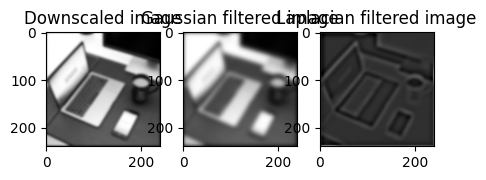

In [97]:
img = rgb2gray(np.array(Image.open('images/coffee.jpg')))
LaplacianPyramid(img, steps=3, factor=0.5, sigma=4)


## **Question 3: Object Identification** *(12 Points)*

*Note: This identification part contains **query and model images** for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files **model.txt** and **query.txt** contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. *

Import some useful libraries

In [98]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [99]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

#### **Question 3.1: Normalized Histogram** *(2/12 Points)*
This exercise aims to implement the stated function **normalized hist**. Such a function takes as input a grey-value image and returns a normalized histogram of pixel intensities. 

*Note: consider that pixel intensities range from $0$ to $255$ when quantizing the image to compute the histogram.*

Once you have implemented your version of the function, you should compare it to the built-in Python function **numpy.histogram**.

*Note: The histograms returned from your function should be approximately the same as the one that gets returned from Numpy's implementation*

In [100]:
def normalized_hist(img_gray, num_bins = 40):
  '''
  Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
  assume that image intensity is between 0 and 255

  img_gray - input image in grayscale format
  num_bins - number of bins in the histogram

  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #number of intensity values 40
  #number of pixels in the image
  #Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1

  bins = np.linspace(0, 255, num_bins + 1) 
  hists = [0 for i in range(num_bins)]

  #print(bins)
  for x in range(len(img_gray)):
    for y in range(len(img_gray[0])):
      intensity = img_gray[x][y] 
      for i in range(len(bins)):
        if intensity >= bins[i] and intensity < bins[i+1]:
          hists[i] += 1
          break



  

  hists = hists / np.sum(hists)


  #print(np.sum(hists))

  

  return hists, bins

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

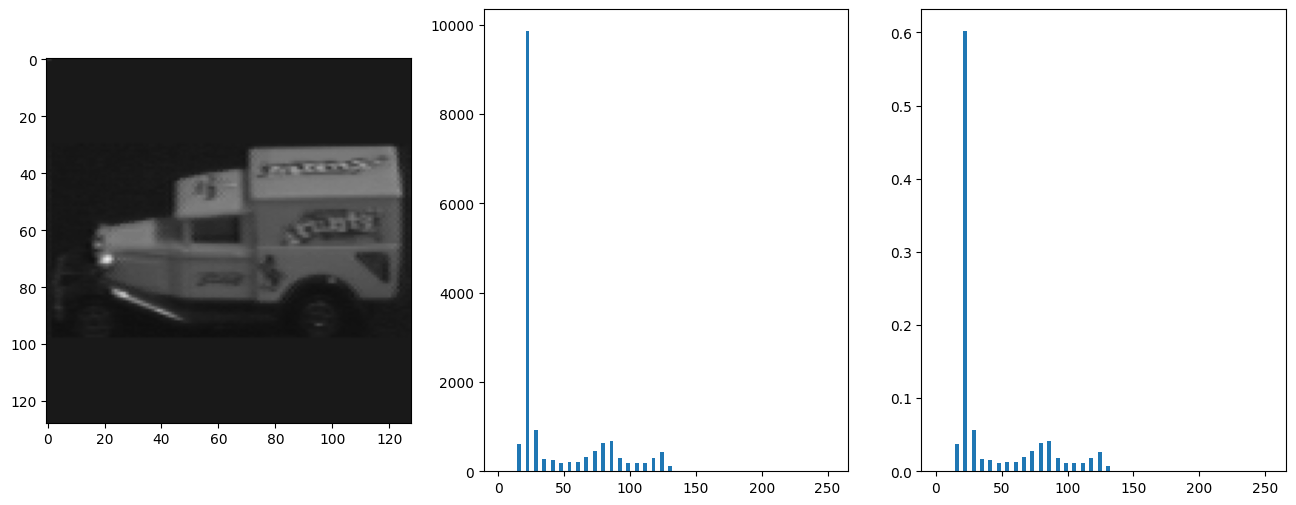

In [101]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1, figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

#### **Question: 3.2: Types of Histograms** *(2/12 Points)*
In this exercise, you must implement two histogram types: **RGB** and **RG**. 
*Note: as before, when considering RGB and RG, you should keep in mind that the range of the pixel's intensity is between $0$ and $255$*

Following, you will find an implemented version of another type of histogram, the dx/dy one. **You need to run the code for later usage without further modifications**

*Note: For the case of dx/dy histogram, the actual image value ranges depend on the chosen Gaussian filtering variance used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$.*

##### **RGB Histogram**

In [115]:
def rgb_hist(img_color_double, num_bins = 5):
  '''
  Compute the *joint* histogram for each color channel in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3

  E.g. hists[0,9,5] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
      - their B values fall in bin 5
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  bins_R = np.linspace(0, 255, num_bins)
  bins_G = np.linspace(0, 255, num_bins)
  bins_B = np.linspace(0, 255, num_bins)

 # print(bins_R)
  #print(bins_G)
 # print(bins_B)

  hists_R = [0 for i in range(num_bins)]
  hists_G = [0 for i in range(num_bins)]
  hists_B = [0 for i in range(num_bins)]

 # print(hists_R)
 # print(hists_G)
 # print(hists_B)

   


  hists = np.zeros((num_bins, num_bins, num_bins))
  
  r, g, b = img_color_double[:, :, 0], img_color_double[:, :, 1], img_color_double[:, :, 2]

  
  hist3d = [[[0 for i in range(num_bins)] for j in range(num_bins)] for z in range(num_bins)]

  finalHist3d = [0  for i in range(num_bins**3)]

  for x in range(len(r)):
    for y in range(len(r[0])):
      intensity_R = r[x][y]
      intensity_G = g[x][y]
      intensity_B = b[x][y]

      for i in range(len(bins_R)):
        if intensity_R >= bins_R[i] and intensity_R < bins_R[i+1]:
          hists_R[i] += 1
          z = i      
          break

      for i in range(len(bins_G)):
        if intensity_G >= bins_G[i] and intensity_G < bins_G[i+1]:
          hists_G[i] += 1

          l = i
          break

      for i in range(len(bins_B)):
        if intensity_B >= bins_B[i] and intensity_B < bins_B[i+1]:
          hists_B[i] += 1

          k = i
          break

      hist3d[z][l][k] += 1


#flatten hist3d into finalHist3d
  for i in range(len(hist3d)):
    for j in range(len(hist3d[0])):
        for k in range(len(hist3d[0][0])):
          finalHist3d[i * (num_bins**2) + j * num_bins + k] = hist3d[i][j][k]  
  return np.array(finalHist3d) / np.sum(finalHist3d)



  


--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

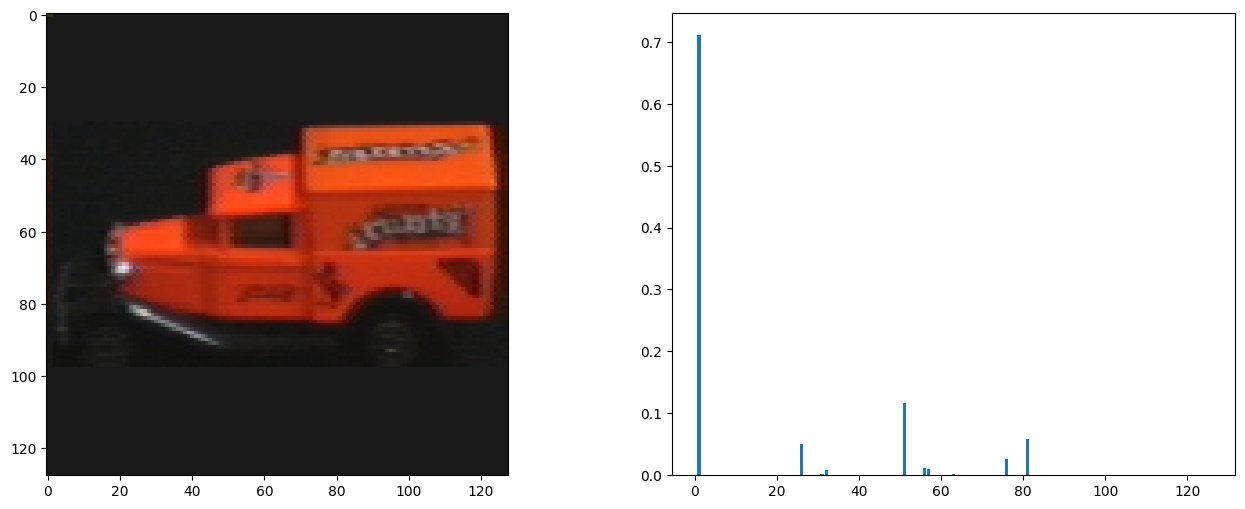

In [116]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2, figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)
plt.show()

##### **RG Histogram**

In [107]:
def rg_hist(img_color_double, num_bins = 5):
  '''
  Compute the *joint* histogram for the R and G color channels in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

  E.g. hists[0,9] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  bins_R = np.linspace(0, 255, num_bins)
  bins_G = np.linspace(0, 255, num_bins)

  hists_R = [0 for i in range(num_bins)]
  hists_G = [0 for i in range(num_bins)]

  hists = np.zeros((num_bins, num_bins))

  r, g = img_color_double[:, :, 0], img_color_double[:, :, 1]

  hist2d = [[0 for i in range(num_bins)] for j in range(num_bins)]

  finalHist2d = [0  for i in range(num_bins**2)]

  for x in range(len(r)):
    for y in range(len(r[0])):
      intensity_R = r[x][y]
      intensity_G = g[x][y]

      for i in range(len(bins_R)):
        if intensity_R >= bins_R[i] and intensity_R < bins_R[i+1]:
          hists_R[i] += 1
          z = i      
          break

      for i in range(len(bins_G)):
        if intensity_G >= bins_G[i] and intensity_G < bins_G[i+1]:
          hists_G[i] += 1

          l = i
          break

      hist2d[z][l] += 1

  for i in range(len(hist2d)):
    for j in range(len(hist2d[0])):
      finalHist2d[i * num_bins + j] = hist2d[i][j]

  return np.array(finalHist2d) / np.sum(finalHist2d)
  
  

 # return hists

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

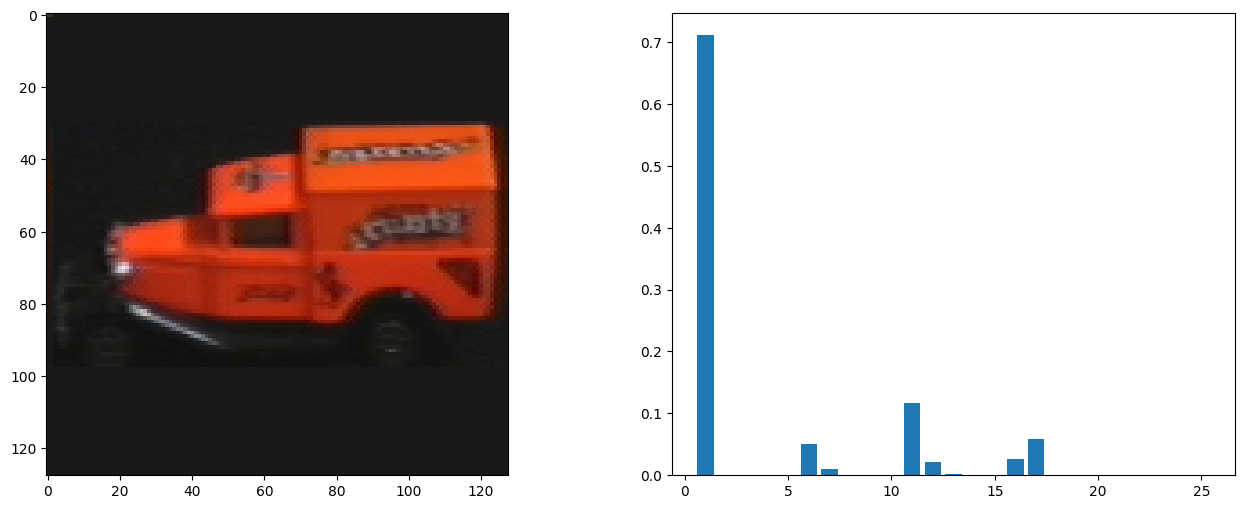

In [108]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3, figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### **DX/DY Histogram** 

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [117]:
def gaussdx(sigma):
  
    rounded_sigma=math.ceil(sigma)
    filter_size = 2*3*rounded_sigma+1
    
    # Generate the index x
    zero_pos = 3*rounded_sigma # The (zero_pos+1)th element is the 0 for the index
    x=np.arange(filter_size)-zero_pos # indexes from -3*rounded_sigma to 3*rounded_sigma
        
    # Compute the Gaussian curve with std-dev sigma at the indexes x
    Dx = -x*np.exp(-x**2/(2.*sigma**2.))/(math.sqrt(2.*np.pi)*sigma**3.)

    return Dx, x

In [118]:
def gaussderiv(img, sigma):
  

    
    Gx, x = gauss(sigma)
    
    Dx, x = gaussdx(sigma)

    Gx = Gx.reshape(1, Gx.size)
    Dx = Dx.reshape(1, Dx.size)

    imgDx = conv2(conv2(img, Dx, 'same'), Gx.T, 'same')
    imgDy = conv2(conv2(img, Gx, 'same'), Dx.T, 'same')

    return imgDx, imgDy

In [119]:
def dxdy_hist(img_gray, num_bins = 5):
    '''
    Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
    Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
    The histogram should be normalized so that sum of all values equals 1

    img_gray - input gray value image
    num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2

    Note: you can use the function gaussderiv from the Filtering exercise
    '''
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    # Compute the first derivatives of img_gray
    sigma = 3.
    img_dx, img_dy = gaussderiv(img_gray, sigma)

    #Set the min_der and max_der to -6 and 6, which defines the ranges for quantization
    min_der=-6
    max_der=6

    #Flatten the 2D derivative images to 1D arrays
    img_dx=img_dx.reshape(-1)
    img_dy=img_dy.reshape(-1)

    # Clip the min and max values to min_der and max_der respectively
    # and shift minumum values to 0
    img_dx = np.clip(img_dx, min_der, max_der) + max_der
    img_dy = np.clip(img_dy, min_der, max_der) + max_der

    hists = np.zeros((num_bins, num_bins), dtype=int)
    bin_range = (max_der-min_der)/num_bins
    
    # quantize image derivative valuer into bins
    img_dx_res = np.floor(img_dx / bin_range).astype(int)
    img_dy_res = np.floor(img_dy / bin_range).astype(int)
    img_dx_res = np.clip(img_dx_res, 0, num_bins-1)
    img_dy_res = np.clip(img_dy_res, 0, num_bins-1)

    for i in range(img_dx_res.size):
        hists[img_dx_res[i], img_dy_res[i]] += 1

    hists = hists.flatten()
    hists = hists / hists.sum()
    return hists

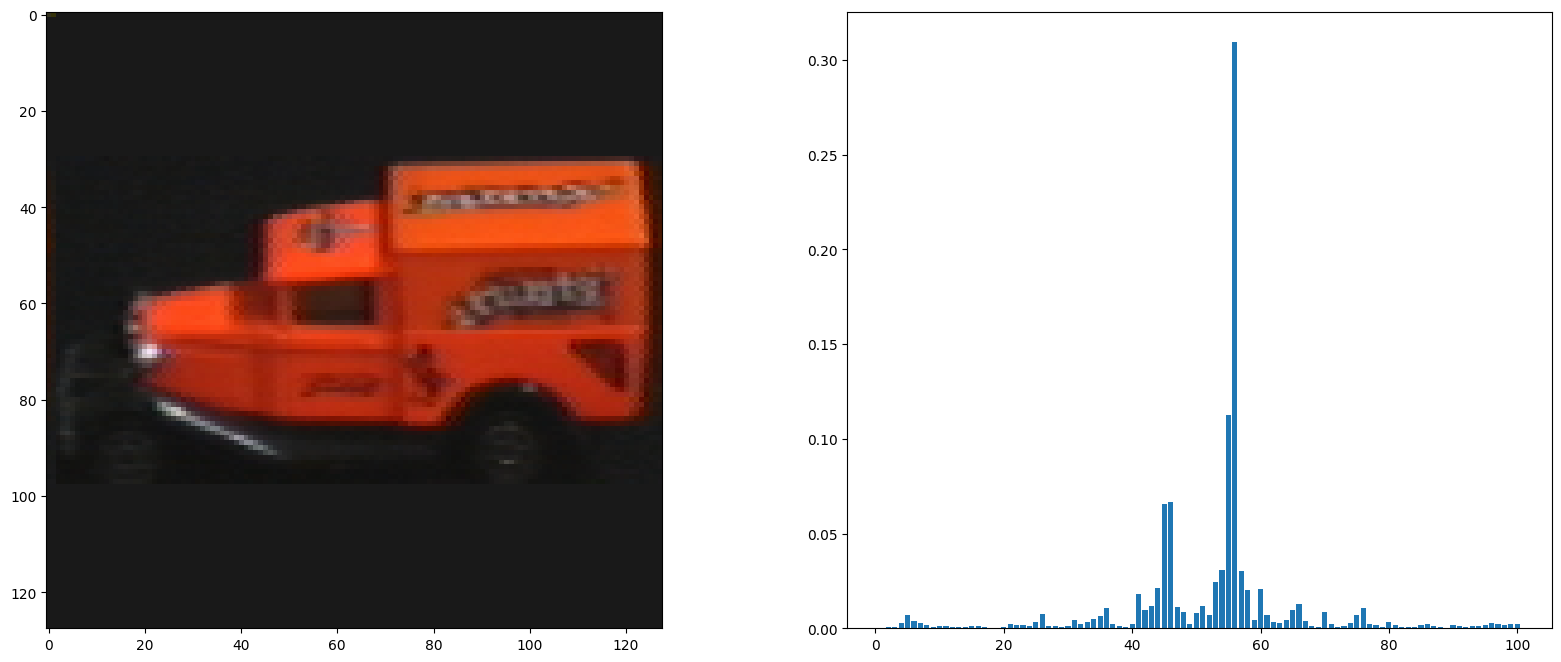

In [120]:
# Compose and test dx/dy histograms (histogram_module.dxdy_hist)

plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

### **Question 3.3: Image Retrival** *(3/12 Points)*
Now that you have implemented and used different types of histograms, it's time to test how suitable they are for retrieving images in a query-by-example scenario. We will provide an additional necessary ingredient, **distance functions**. 

*Note: The distance functions will already be available to you, but you will need to use them in the best possible way.*

Implement a function called **find_best_match**, which takes a list of **model images** and a list of **query images** and returns the index of the closest model image for each query image. 
The function takes input string parameters, identifying the distance function, histogram function, and the number of histogram bins. 

*Note: See comments at the beginning of the **find_best_match** function for more details. *

Additionally to the indices of the best matching images, your implementation should also return a matrix that contains distances between all pairs of model and query images.

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

**Distance functions**


* Intersection distance function:

\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

* $L_2$ distance function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

* $Chi^2$ distance function:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [121]:
def dist_intersect(x,y):
  '''
  Compute the intersection distance between histograms x and y
Return 1 - hist_intersection, so smaller values correspond to more similar histograms
Check that the distance range in [0,1]
  '''

  min_sum = sum(np.minimum(x,y))
  hist_intersection = 0.5 * min_sum * ( (1/sum(x)) + (1/sum(y)) )
  
  return 1 - hist_intersection


def dist_l2(x,y):
  '''
  Compute the L2 distance between x and y histograms
  Check that the distance range in [0,sqrt(2)]
  '''
    
  l2_dist = math.sqrt(  sum( (x-y)**2. )  )
  return l2_dist


def dist_chi2(x,y):
  '''
  Compute chi2 distance between x and y
  Check that the distance range in [0,Inf]
  Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
  '''

  chi2_dist = sum(   ((x-y)**2.) / (x+y+1)   )
  return chi2_dist

In [125]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    pass
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [134]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
  '''
  this function returns a list containing the histograms for
  the list of images given as input.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  
 # return image_hist



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  Function to find the best match for each image in the 
  query folder.
  Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "rg", "dxdy".
  
  Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################  
  

  return best_match, D

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [135]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

dist_type = 'intersect'
hist_type = 'rgb'
num_bins = 10

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

### **Question 3.4: Closest Neighbours** *(3/12 Points)*

Implement a function **show_neighbors**, which inputs a list of **model images** and a list of **query images**.  For each **query image**, the function has to output a visualization of **5 model images** which are most similar to the query image according to the specified distance metric. 

*Note: use the function **find_best_match**. See the Figure below for an example of the output.*

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [ ]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

  Note: use the previously implemented function 'find_best_match'
  Note: use subplot command to show all the images in the same Python figure, one row per query image
  
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  return

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [ ]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

### **#2 Report** *(2/12 Points)*

Experiment with different functions and numbers of histogram bins, and find a combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


----------------------------

**Fill the table below**

----------------------------


|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 |  |  |  |
| 2 |  |  |  |
| 3 |  |  |  |
| ... |  |  |  |


## ***Bonus* Question 4: Performance Evaluation** *(5 Points)*

In this bonus question, your goal is to **implement different types of metrics** to evaluate the performance of a binary classificator.

For the purpose of this exercise you don't need to know the inner workings of the ML model, therefore imagine to have a black box model that estimates the probability of an event occurring, such as the sky being clear or not, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In order to compute a performance score (e.g., accuracy), you need to compare your predictions with the true values. So you need to convert the predicted probabilities into 0s and 1s by means of a threshold.

What you have to do is the following:
- **compute the performance** of the model with all the possible tresholds in the interval \[0.0, 1.0\] with increments of 0.5
- **analyze** how the metrics vary at different thresholds and **write a report** on your analysis

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### **Question 4.1: Performance Evaluation** *(3/5 Points)*

Write the code to compute the metrics for performance evaluation, then run the provided code cell to check if your results are correct.

In [139]:
#####################################################
##    RUN THIS CELL WITHOUT CHANGING THE CODE      ##
#####################################################

data = pd.read_csv('./ionosphere.data', header=None) 
X = data[data.columns[:34]]
y = data[data.columns[-1]]
y = np.array([0 if value == 'b' else 1 for value in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

In [161]:
def my_accuracy_score(y_true, y_pred):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    #IMPORTANTE, NON POSSIAMO USARE SKLEARN

    z = zip(y_true, y_pred)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in z:
        if i[0] == 1 and i[1] == 1:
            TP += 1
        elif i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
    accuracy = (TP + TN) / (TP + TN + FP + FN)


    

    return accuracy

In [163]:
def my_precision_score(y_true, y_pred):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    z = zip(y_true, y_pred)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in z:
        if i[0] == 1 and i[1] == 1:
            TP += 1
        elif i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
    precision = TP / (TP + FP)
    
    return precision

In [142]:
def my_recall_score(y_true, y_pred):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    z = zip(y_true, y_pred)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in z:
        if i[0] == 1 and i[1] == 1:
            TP += 1
        elif i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
    recall = TP / (TP + FN)

    return recall

In [164]:
def my_f1_score(y_true, y_pred):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    z = zip(y_true, y_pred)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in z:
        if i[0] == 1 and i[1] == 1:
            TP += 1
        elif i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    
    return f1

In [167]:
def my_confusion_matrix(y_true, y_pred):
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    z = zip(y_true, y_pred)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in z:
        if i[0] == 1 and i[1] == 1:
            TP += 1
        elif i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
    matrix = np.array([[TN, FP], [FN, TP]])


    return np.array(matrix, dtype=np.int64)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [168]:
# CHECK IF YOUR METRICS ARE CORRECT BY RUNNING THIS CODE CELL

def compare_metric(my_metric_fun, metric_fun, y_test, preds):
    try:
        if my_metric_fun.__name__ != 'my_confusion_matrix':
            assert round(my_metric_fun(y_test, preds), 4) == round(metric_fun(y_test, preds), 4)
        else:
            assert np.array_equal(my_metric_fun(y_test, preds), metric_fun(y_test, preds))
        print(f"{my_metric_fun.__name__} is correct")
    except:
        print(f"{my_metric_fun.__name__} is wrong")

preds = np.array([0 if p < 0.5 else 1 for p in y_pred])
compare_metric(my_accuracy_score, accuracy_score, y_test, preds)
compare_metric(my_precision_score, precision_score, y_test, preds)
compare_metric(my_recall_score, recall_score, y_test, preds)
compare_metric(my_f1_score, f1_score, y_test, preds)
compare_metric(my_confusion_matrix, confusion_matrix, y_test, preds)

my_accuracy_score is correct
my_precision_score is correct
my_recall_score is correct
my_f1_score is correct
my_confusion_matrix is correct


### **Question 4.2: Analysis and Report** *(2/5 Points)*

Write the code to compute the metrics all the possible tresholds in the interval (0.0, 1.0) with increments of 0.5.  
Ideally, you should put everything into a pandas DataFrame and print it for a better visualization.  
Then, write a report analyzing you your results. You have complete freedom on your analysis.

Imagine also to be in a medical scenario where your model is predicting the presence or not of a desease and try to answer to the following questions:
- What is the real life trade-off between high precision and high recall? What would you choose?
- Why isn't the accuracy an appropriate measure in such scenario?

[0.5681818181818182, 0.9090909090909091]
[0.5681818181818182, 0.8620689655172413]
[1.0, 1.0]
[0.7246376811594203, 0.9259259259259259]


<AxesSubplot: xlabel='threshold'>

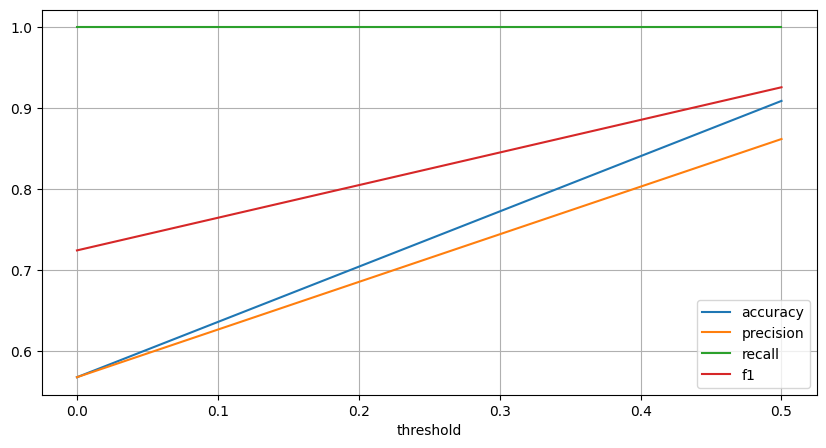

In [150]:
#compute the metrix with all the possibile threshold in the range [0,1]
thresholds = np.arange(0,1,0.5)
acc = []
prec = []
rec = []
f1 = []
for t in thresholds:
    preds = np.array([0 if p < t else 1 for p in y_pred])
    acc.append(my_accuracy_score(y_test, preds))
    prec.append(my_precision_score(y_test, preds))
    rec.append(my_recall_score(y_test, preds))
    f1.append(my_f1_score(y_test, preds))
print(acc)
print(prec)
print(rec)
print(f1)

#put the results in a dataframe and plot the results
df = pd.DataFrame({'threshold': thresholds, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})
df.plot(x='threshold', y=['accuracy', 'precision', 'recall', 'f1'], figsize=(10,5), grid=True)

